In [2]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, StrMethodFormatter

import seaborn as sns

In [1]:
cd zippedData/

C:\Users\joshu\Documents\Flatiron\phase1_project\dsc-phase-1-project-v2-4\zippedData


In [3]:
movie_ratings = pd.read_csv('tmdb.movies.csv.gz')

movie_ratings = movie_ratings.drop('Unnamed: 0', axis=1)

movie_ratings = movie_ratings.replace('Star Wars: The Last Jedi', 'Star Wars Ep. VIII: The Last Jedi')
movie_ratings = movie_ratings.replace('Star Wars: The Force Awakens', 'Star Wars Ep. VII: The Force Awakens')

movie_ratings = movie_ratings[movie_ratings.vote_count >= 50]

movie_ratings['release_date'] = pd.to_datetime(movie_ratings['release_date'])
movie_ratings['release_date'] = movie_ratings['release_date'].dt.strftime('%b %d, %Y')

movie_ratings = movie_ratings.rename(columns={'original_title': 'movie'})
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5108 entries, 0 to 25148
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          5108 non-null   object 
 1   id                 5108 non-null   int64  
 2   original_language  5108 non-null   object 
 3   movie              5108 non-null   object 
 4   popularity         5108 non-null   float64
 5   release_date       5108 non-null   object 
 6   title              5108 non-null   object 
 7   vote_average       5108 non-null   float64
 8   vote_count         5108 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 399.1+ KB


In [4]:
movie_ratings = movie_ratings.drop(['genre_ids', 'id', 'original_language', 'title'], axis=1)
movie_ratings.sample(5, random_state=23)

,movie,popularity,release_date,vote_average,vote_count
11056,The Expendables 3,18.797,"Aug 15, 2014",6.1,2876
14573,Magical Girl,6.741,"Jan 07, 2015",7.5,95
24189,The Clovehitch Killer,9.740,"Nov 16, 2018",6.5,130
5301,The Watch,10.228,"Jul 27, 2012",5.4,1356
17557,How to Be Single,10.271,"Feb 12, 2016",6.1,2036


In [5]:
budget = pd.read_csv('tn.movie_budgets.csv.gz')

budget['production_budget'] = budget['production_budget'].map(lambda x: x.lstrip('$'))
budget['domestic_gross'] = budget['domestic_gross'].map(lambda x: x.lstrip('$'))
budget['worldwide_gross'] = budget['worldwide_gross'].map(lambda x: x.lstrip('$'))

budget['production_budget'] = budget['production_budget'].replace(',', '', regex=True)
budget['domestic_gross'] = budget['domestic_gross'].replace(',', '', regex=True)
budget['worldwide_gross'] = budget['worldwide_gross'].replace(',', '', regex=True)
budget['domestic_gross'] = budget['domestic_gross'].astype('float64')
budget['worldwide_gross'] = budget['worldwide_gross'].astype('float64')
budget['production_budget'] = budget['production_budget'].astype('float64')

budget['ROI'] = budget['domestic_gross'] + budget['worldwide_gross'] - budget['production_budget']
budget['Percent_change'] = (budget['ROI'] / budget['production_budget'] *100)

budget.sort_values(by='ROI', ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 2
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   Percent_change     5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 406.5+ KB


In [6]:
budget = budget[(budget['domestic_gross'] > 0) & (budget['worldwide_gross'] > 0)]
budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   ROI                5234 non-null   float64
 7   Percent_change     5234 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 368.0+ KB


In [7]:
#movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

#movie_gross = movie_gross.drop(['studio', 'year'], axis=1)
#movie_gross = movie_gross.dropna()
#movie_gross = movie_gross.rename(columns={'title': 'movie', 'foreign_gross': 'worldwide_gross'})

#movie_gross['worldwide_gross'] = movie_gross['worldwide_gross'].replace(',', '', regex=True)
#movie_gross['worldwide_gross'] = movie_gross['worldwide_gross'].astype('float64')

#movie_gross.head()

In [8]:
merged = pd.merge(budget, movie_ratings, how='outer', left_on=['movie','release_date'], right_on=['movie','release_date'])
merged = merged.drop('popularity', axis=1)
merged.sample(5, random_state=42)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_average,vote_count
2210,3.0,"Dec 9, 1983",Scarface,25000000.0,44942821.0,44942821.0,64885642.0,259.542568,NaN,NaN
2907,27.0,"Jun 2, 1989",Dead Poets Society,16400000.0,95860116.0,239500000.0,318960116.0,1944.878756,NaN,NaN
1530,9.0,"Oct 23, 2009",Cirque du Freak: The Vampire's Assistant,40000000.0,14046595.0,39753957.0,13800552.0,34.501380,NaN,NaN
5853,NaN,"Oct 14, 2011",Chillerama,NaN,NaN,NaN,NaN,NaN,5.7,50.0
4074,63.0,"Mar 14, 2014",Veronica Mars,6000000.0,3322127.0,3485383.0,807510.0,13.458500,6.7,699.0


In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9488 entries, 0 to 9487
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5333 non-null   float64
 1   release_date       9488 non-null   object 
 2   movie              9488 non-null   object 
 3   production_budget  5333 non-null   float64
 4   domestic_gross     5333 non-null   float64
 5   worldwide_gross    5333 non-null   float64
 6   ROI                5333 non-null   float64
 7   Percent_change     5333 non-null   float64
 8   vote_average       5108 non-null   float64
 9   vote_count         5108 non-null   float64
dtypes: float64(8), object(2)
memory usage: 815.4+ KB


In [10]:
cd im.db/

C:\Users\joshu\Documents\Flatiron\phase1_project\dsc-phase-1-project-v2-4\zippedData\im.db


In [11]:
conn = sqlite3.connect('im.db')

cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [12]:
directors = pd.read_sql("""
SELECT primary_name, primary_title, genres, averagerating, numvotes
  FROM directors
JOIN persons
    ON persons.person_id = directors.person_id
JOIN movie_basics
    ON movie_basics.movie_id = directors.movie_id
JOIN movie_ratings
    ON movie_ratings.movie_id = directors.movie_id
ORDER BY averagerating DESC
;
""", conn)

In [13]:
directors = directors.rename(columns={'primary_title': 'movie',
                                      'averagerating':'vote_average',
                                      'primary_name': 'director'})

directors = directors.replace('Star Wars: The Last Jedi',
                              'Star Wars Ep. VIII: The Last Jedi')
directors = directors.replace('Star Wars: Episode VII - The Force Awakens',
                              'Star Wars Ep. VII: The Force Awakens')
directors = directors.replace('Harry Potter and the Deathly Hallows: Part 2',
                              'Harry Potter and the Deathly Hallows: Part II')
directors = directors.replace('Harry Potter and the Deathly Hallows: Part 1',
                              'Harry Potter and the Deathly Hallows: Part I')
directors['genres'] = directors['genres'].replace(',', ', ', regex=True)

directors = directors[directors['numvotes'] >= 50]
directors = directors.drop_duplicates(subset=['movie', 'director'])
directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42316 entries, 21 to 181361
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   director      42316 non-null  object 
 1   movie         42316 non-null  object 
 2   genres        42219 non-null  object 
 3   vote_average  42316 non-null  float64
 4   numvotes      42316 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [14]:
writers = pd.read_sql("""
SELECT primary_name, primary_title, genres, averagerating, numvotes
  FROM writers
JOIN persons
    ON persons.person_id = writers.person_id
JOIN movie_basics
    ON movie_basics.movie_id = writers.movie_id
JOIN movie_ratings
    ON movie_ratings.movie_id = writers.movie_id
ORDER BY averagerating DESC
;
""", conn)

In [15]:
writers = writers.rename(columns={'primary_title': 'movie',
                                  'averagerating':'vote_average',
                                  'primary_name': 'writer'})
writers = writers.replace('Star Wars: The Last Jedi',
                              'Star Wars Ep. VIII: The Last Jedi')
writers = writers.replace('Star Wars: Episode VII - The Force Awakens',
                              'Star Wars Ep. VII: The Force Awakens')
writers = writers.replace('Harry Potter and the Deathly Hallows: Part 2',
                              'Harry Potter and the Deathly Hallows: Part II')
writers = writers.replace('Harry Potter and the Deathly Hallows: Part 1',
                              'Harry Potter and the Deathly Hallows: Part I')

writers = writers.drop_duplicates(subset=['movie', 'writer'])
writers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111583 entries, 0 to 169301
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   writer        111583 non-null  object 
 1   movie         111583 non-null  object 
 2   genres        110819 non-null  object 
 3   vote_average  111583 non-null  float64
 4   numvotes      111583 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [16]:
famousppl = pd.read_sql("""
SELECT primary_name, primary_profession, primary_title, genres, averagerating, numvotes
  FROM known_for
JOIN persons
    ON persons.person_id = known_for.person_id
JOIN movie_basics
    ON movie_basics.movie_id = known_for.movie_id
JOIN movie_ratings
    ON movie_ratings.movie_id = known_for.movie_id
ORDER BY averagerating DESC
;
""", conn)

In [17]:
famousppl = famousppl.rename(columns={'primary_title': 'movie',
                                      'averagerating':'vote_average',
                                      'primary_name': 'renown'})

famousppl = famousppl.replace('Star Wars: The Last Jedi',
                              'Star Wars Ep. VIII: The Last Jedi')
famousppl = famousppl.replace('Star Wars: Episode VII - The Force Awakens',
                              'Star Wars Ep. VII: The Force Awakens')
famousppl = famousppl.replace('Harry Potter and the Deathly Hallows: Part 2',
                              'Harry Potter and the Deathly Hallows: Part II')
famousppl = famousppl.replace('Harry Potter and the Deathly Hallows: Part 1',
                              'Harry Potter and the Deathly Hallows: Part I')

famousppl = famousppl.drop_duplicates(subset=['movie', 'renown'])
famousppl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525685 entries, 0 to 526727
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   renown              525685 non-null  object 
 1   primary_profession  505026 non-null  object 
 2   movie               525685 non-null  object 
 3   genres              522255 non-null  object 
 4   vote_average        525685 non-null  float64
 5   numvotes            525685 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 28.1+ MB


In [18]:
directors_ROI = pd.merge(directors, merged, how='left', left_on='movie', right_on='movie')
writers_ROI = pd.merge(writers, merged, how='left', left_on='movie', right_on='movie')
famousppl_ROI = pd.merge(famousppl, merged, how='left', left_on='movie', right_on='movie')

directors_ROI['rating_average'] = directors_ROI['vote_average_x'].fillna(directors_ROI['vote_average_y'])
directors_ROI['vote_count'] = directors_ROI['vote_count'].fillna(directors_ROI['numvotes'])
writers_ROI['rating_average'] = writers_ROI['vote_average_x'].fillna(writers_ROI['vote_average_y'])
writers_ROI['vote_count'] = writers_ROI['vote_count'].fillna(writers_ROI['numvotes'])
famousppl_ROI['rating_average'] = famousppl_ROI['vote_average_x'].fillna(famousppl_ROI['vote_average_y'])
famousppl_ROI['vote_count'] = famousppl_ROI['vote_count'].fillna(famousppl_ROI['numvotes'])

directors_ROI = directors_ROI.drop(['id', 'numvotes', 'vote_average_x', 'vote_average_y'], axis=1)
writers_ROI = writers_ROI.drop(['id', 'numvotes', 'vote_average_x', 'vote_average_y'], axis=1)
famousppl_ROI = famousppl_ROI.drop(['id', 'numvotes', 'vote_average_x', 'vote_average_y'], axis=1)

directors_ROI = directors_ROI.drop_duplicates(subset=['movie', 'director'])
directors_ROI = directors_ROI.dropna()

writers_ROI = writers_ROI.drop_duplicates(subset=['movie', 'writer'])
writers_ROI = writers_ROI.dropna()

famousppl_ROI = famousppl_ROI.drop_duplicates(subset=['movie', 'renown'])
famousppl_ROI = famousppl_ROI.dropna()

In [19]:
directors_ROI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 144 to 43403
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           2195 non-null   object 
 1   movie              2195 non-null   object 
 2   genres             2195 non-null   object 
 3   release_date       2195 non-null   object 
 4   production_budget  2195 non-null   float64
 5   domestic_gross     2195 non-null   float64
 6   worldwide_gross    2195 non-null   float64
 7   ROI                2195 non-null   float64
 8   Percent_change     2195 non-null   float64
 9   vote_count         2195 non-null   float64
 10  rating_average     2195 non-null   float64
dtypes: float64(7), object(4)
memory usage: 205.8+ KB


In [20]:
writers_ROI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 415 to 114041
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   writer             5160 non-null   object 
 1   movie              5160 non-null   object 
 2   genres             5160 non-null   object 
 3   release_date       5160 non-null   object 
 4   production_budget  5160 non-null   float64
 5   domestic_gross     5160 non-null   float64
 6   worldwide_gross    5160 non-null   float64
 7   ROI                5160 non-null   float64
 8   Percent_change     5160 non-null   float64
 9   vote_count         5160 non-null   float64
 10  rating_average     5160 non-null   float64
dtypes: float64(7), object(4)
memory usage: 483.8+ KB


In [21]:
famousppl_ROI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49729 entries, 1082 to 553552
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   renown              49729 non-null  object 
 1   primary_profession  49729 non-null  object 
 2   movie               49729 non-null  object 
 3   genres              49729 non-null  object 
 4   release_date        49729 non-null  object 
 5   production_budget   49729 non-null  float64
 6   domestic_gross      49729 non-null  float64
 7   worldwide_gross     49729 non-null  float64
 8   ROI                 49729 non-null  float64
 9   Percent_change      49729 non-null  float64
 10  vote_count          49729 non-null  float64
 11  rating_average      49729 non-null  float64
dtypes: float64(7), object(5)
memory usage: 4.9+ MB


In [22]:
top_directors = directors_ROI.sort_values(by='ROI', ascending=False)
top_directors = top_directors.iloc[:220]

bot_directors = directors_ROI.sort_values(by='ROI', ascending=True)
bot_directors = bot_directors.iloc[:220]

mid_directors = directors_ROI.sort_values(by='ROI', ascending=True)
mid_directors = mid_directors.iloc[730:1430]

dir_1 = top_directors.assign(Rank='Highest ROI')
dir_2 = mid_directors.assign(Rank='Mid ROI')
dir_3 = bot_directors.assign(Rank='Lowest ROI')

concat_directors = pd.concat([dir_1, dir_2, dir_3])
concat_directors.head()

,director,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average,Rank
2006,J.J. Abrams,Star Wars Ep. VII: The Force Awakens,"Action, Adventure, Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0,Highest ROI
719,Anthony Russo,Avengers: Infinity War,"Action, Adventure, Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5,Highest ROI
720,Joe Russo,Avengers: Infinity War,"Action, Adventure, Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5,Highest ROI
10741,Colin Trevorrow,Jurassic World,"Action, Adventure, Sci-Fi","Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2.086125e+09,970.290925,14056.0,7.0,Highest ROI
1827,Joss Whedon,The Avengers,"Action, Adventure, Sci-Fi","May 4, 2012",225000000.0,623279547.0,1.517936e+09,1.916215e+09,851.651308,1183655.0,8.1,Highest ROI


In [23]:
action = top_directors.loc[top_directors['genres'].str.contains('Action')].assign(Genre='Action')
adventure = top_directors.loc[top_directors['genres'].str.contains('Adventure')].assign(Genre='Adventure')
scifi = top_directors.loc[top_directors['genres'].str.contains('Sci-Fi')].assign(Genre='Sci-Fi')
comedy = top_directors.loc[top_directors['genres'].str.contains('Comedy')].assign(Genre='Comedy')
drama = top_directors.loc[top_directors['genres'].str.contains('Drama')].assign(Genre='Drama')
fantasy = top_directors.loc[top_directors['genres'].str.contains('Fantasy')].assign(Genre='Fantasy')
animation = top_directors.loc[top_directors['genres'].str.contains('Animation')].assign(Genre='Animation')
horror = top_directors.loc[top_directors['genres'].str.contains('Horror')].assign(Genre='Horror')
family = top_directors.loc[top_directors['genres'].str.contains('Family')].assign(Genre='Family')

concat_genres = pd.concat([action, adventure, scifi, comedy, drama, fantasy, animation, horror, family])

In [24]:
concat_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2006 to 2188
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           557 non-null    object 
 1   movie              557 non-null    object 
 2   genres             557 non-null    object 
 3   release_date       557 non-null    object 
 4   production_budget  557 non-null    float64
 5   domestic_gross     557 non-null    float64
 6   worldwide_gross    557 non-null    float64
 7   ROI                557 non-null    float64
 8   Percent_change     557 non-null    float64
 9   vote_count         557 non-null    float64
 10  rating_average     557 non-null    float64
 11  Genre              557 non-null    object 
dtypes: float64(7), object(5)
memory usage: 56.6+ KB


Text(0, 0.5, 'Count')

<Figure size 2000x1200 with 0 Axes>

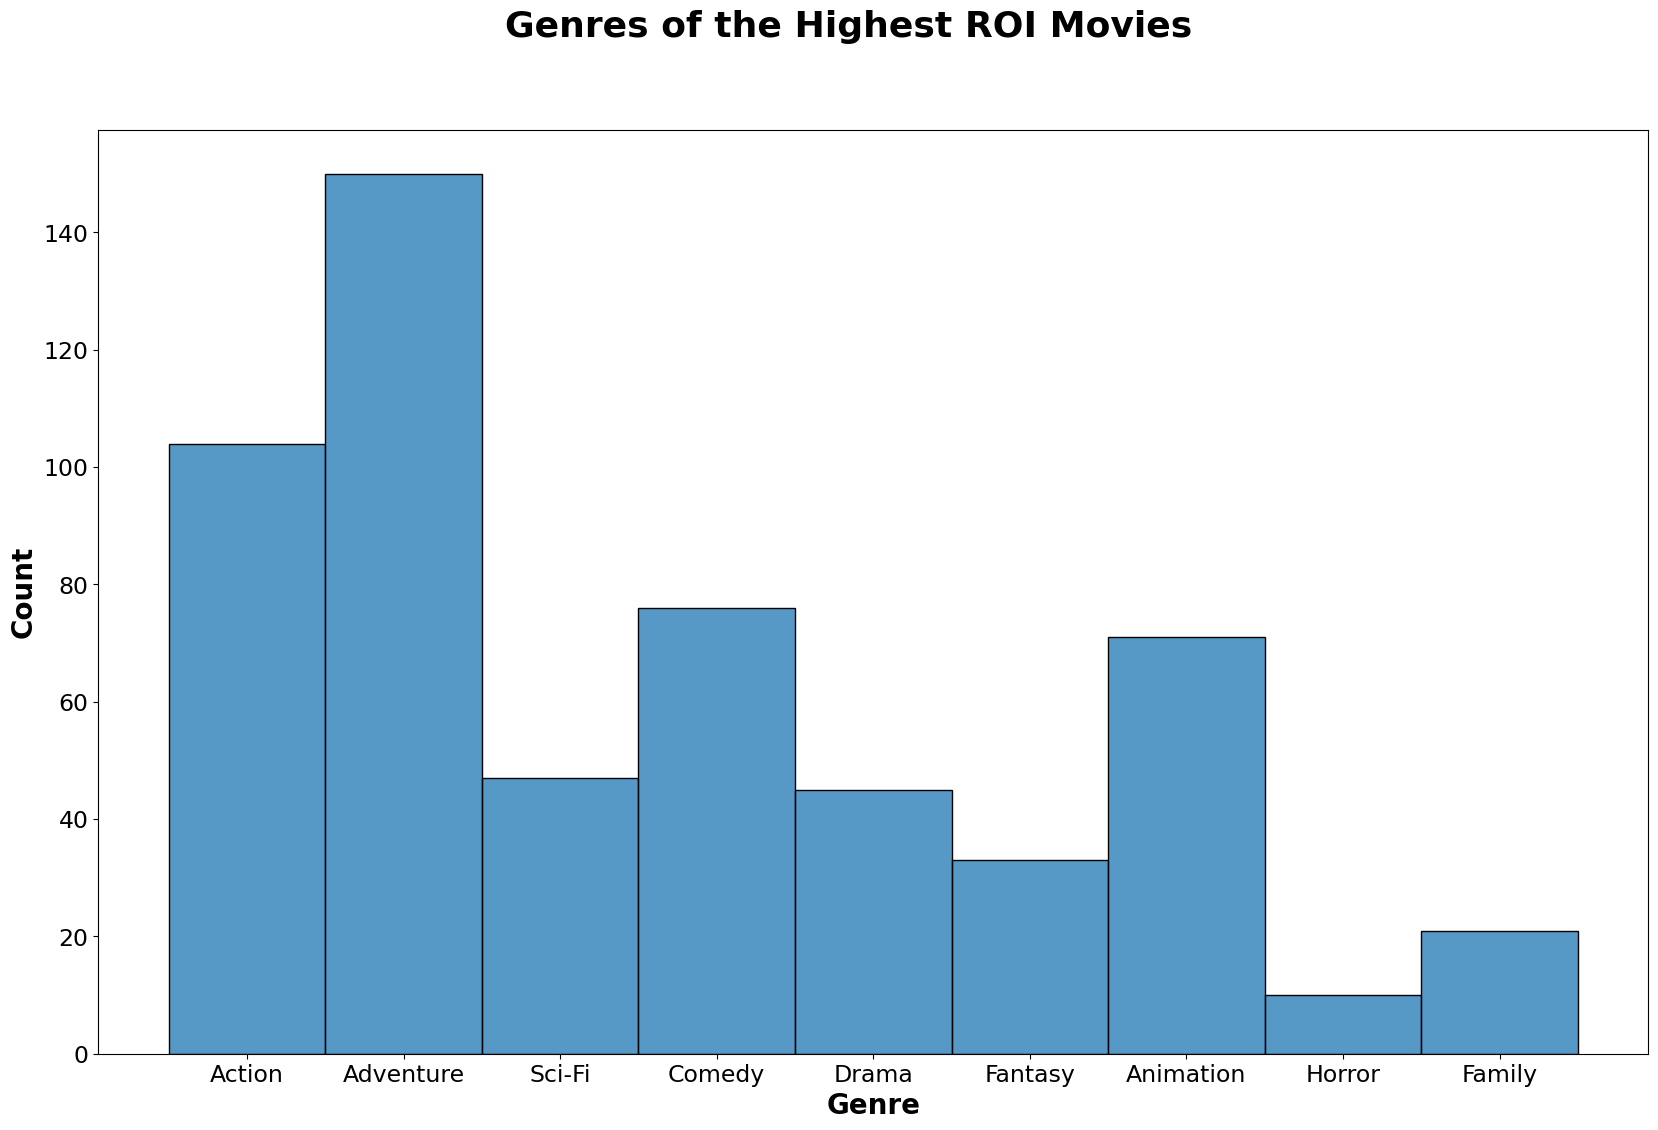

In [74]:
fig = plt.figure(figsize=(20,12), dpi=100)

fig, ax = plt.subplots(figsize=(20,12), dpi=100, facecolor='w', edgecolor='k')

graph = sns.histplot(data=concat_genres.Genre)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Genres of the Highest ROI Movies", fontweight='bold', fontsize=26)
ax.set_xlabel("Genre", fontsize=20, fontweight='bold')
ax.set_ylabel("Count", fontsize=20, fontweight='bold')

''

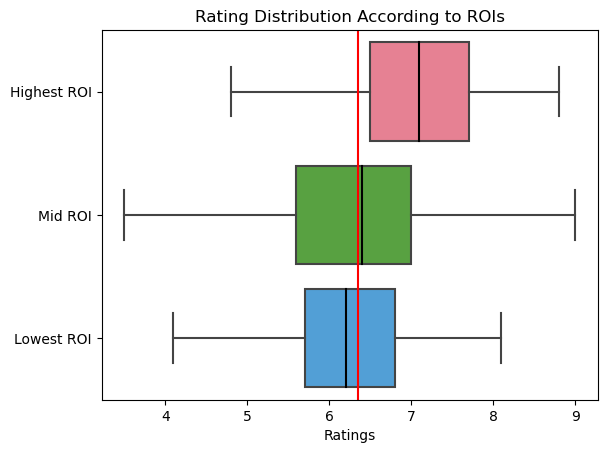

In [50]:
fig = sns.boxplot(
    data=concat_directors,
    x='rating_average',
    y='Rank',
    medianprops={'color': 'black'},
    orient='h',
    showfliers=False,
    palette='husl'
).set(title='Rating Distribution According to ROIs')
plt.xlabel('Ratings')
plt.ylabel('')
plt.axvline(6.35, color='red')
;

In [51]:
concat_directors.head(10)

,director,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average,Rank
2006,J.J. Abrams,Star Wars Ep. VII: The Force Awakens,"Action, Adventure, Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0,Highest ROI
719,Anthony Russo,Avengers: Infinity War,"Action, Adventure, Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5,Highest ROI
720,Joe Russo,Avengers: Infinity War,"Action, Adventure, Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5,Highest ROI
10741,Colin Trevorrow,Jurassic World,"Action, Adventure, Sci-Fi","Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2.086125e+09,970.290925,14056.0,7.0,Highest ROI
1827,Joss Whedon,The Avengers,"Action, Adventure, Sci-Fi","May 4, 2012",225000000.0,623279547.0,1.517936e+09,1.916215e+09,851.651308,1183655.0,8.1,Highest ROI
6709,Ryan Coogler,Black Panther,"Action, Adventure, Sci-Fi","Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,1.848318e+09,924.158895,12365.0,7.3,Highest ROI
8051,James Wan,Furious 7,"Action, Crime, Thriller","Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,1.681730e+09,885.120955,335074.0,7.2,Highest ROI
3818,Brad Bird,Incredibles 2,"Action, Adventure, Animation","Jun 15, 2018",200000000.0,608581744.0,1.242521e+09,1.651102e+09,825.551227,6354.0,7.7,Highest ROI
9077,Rian Johnson,Star Wars Ep. VIII: The Last Jedi,"Action, Adventure, Fantasy","Dec 15, 2017",317000000.0,620181382.0,1.316722e+09,1.619903e+09,511.010451,8534.0,7.1,Highest ROI
7905,Bill Condon,Beauty and the Beast,"Family, Fantasy, Musical","Mar 17, 2017",160000000.0,504014165.0,1.259200e+09,1.603214e+09,1002.008669,11023.0,7.2,Highest ROI


In [54]:
russo = directors_ROI.loc[directors_ROI['director'].str.contains('Joe Russo')]
whedon = directors_ROI.loc[directors_ROI['director'].str.contains('Whedon')]
abrams = directors_ROI.loc[directors_ROI['director'].str.contains('J.J. Abrams')]
spielberg = directors_ROI.loc[directors_ROI['director'].str.contains('Steven Spielberg')]
wan = directors_ROI.loc[directors_ROI['director'].str.contains('James Wan')]
bay = directors_ROI.loc[directors_ROI['director'].str.contains('Michael Bay')]

some_directors = pd.concat([russo, whedon, abrams, spielberg, wan, bay])

<Figure size 1500x1000 with 0 Axes>

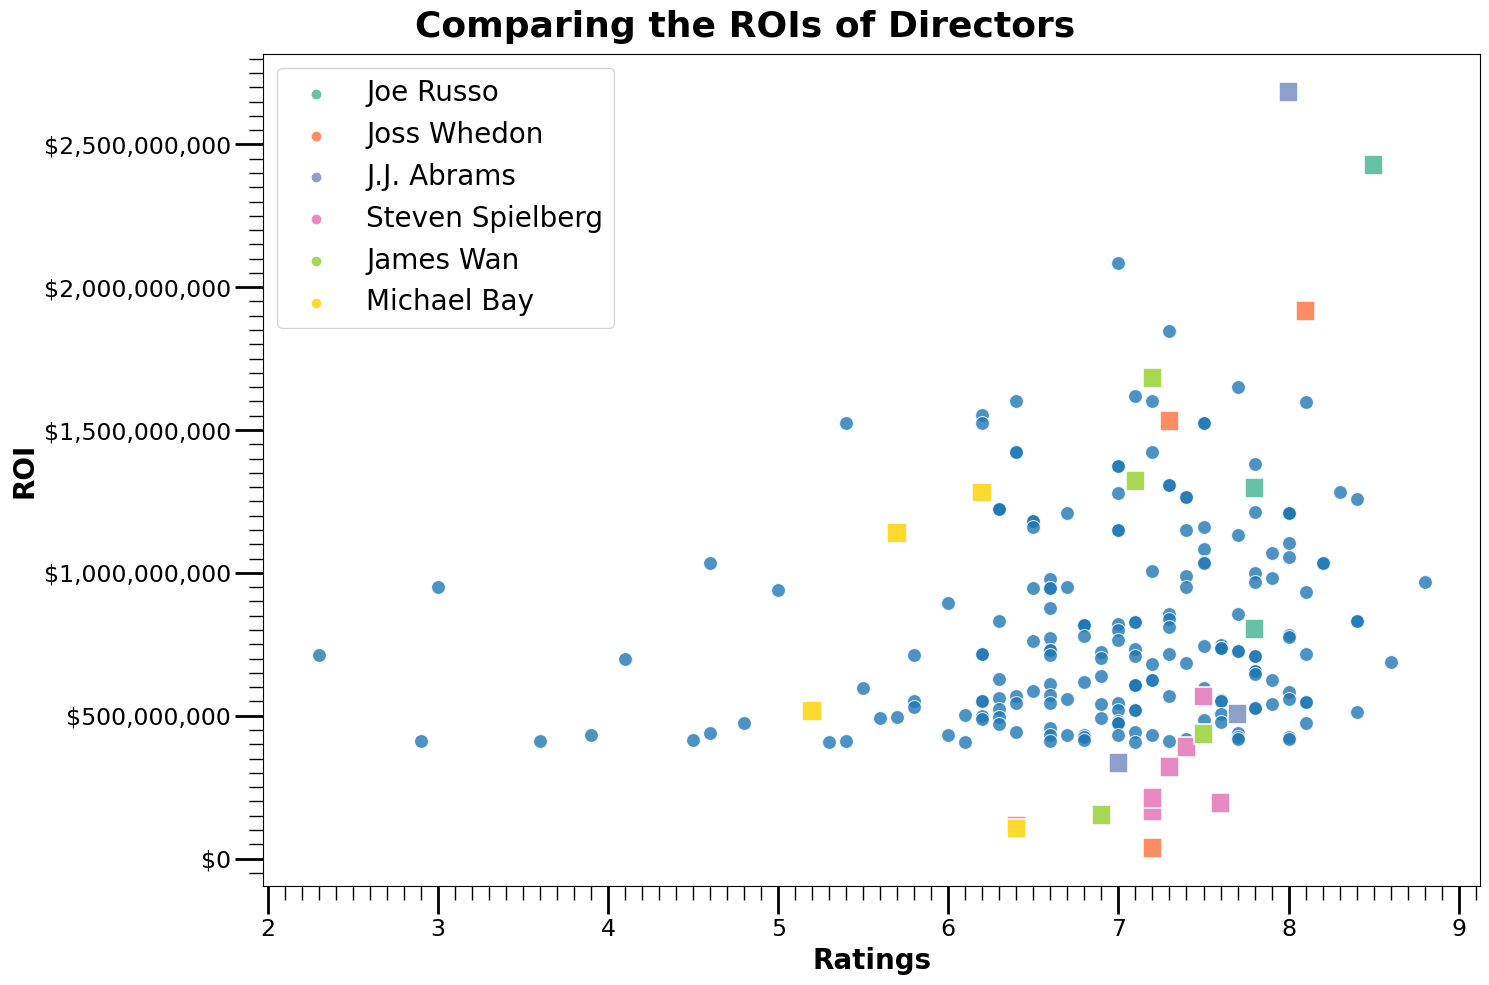

In [68]:
fig = plt.figure(figsize=(15,10), dpi=100)

fig, ax = plt.subplots(figsize=(15,10), dpi=100, facecolor='w', edgecolor='k')

top_directors_graph = sns.scatterplot(x='rating_average', y='ROI', data=top_directors, legend='full', alpha=0.8, s=100, palette='Set2')
directors_graph = sns.scatterplot(x='rating_average', y='ROI', data=some_directors, legend='full', s=200, hue='director', palette='Set2', marker='s')

ax.yaxis.set_major_locator(MultipleLocator(500000000.00))
ax.yaxis.set_minor_locator(MultipleLocator(50000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Comparing the ROIs of Directors", fontweight='bold', fontsize=26)
ax.set_xlabel("Ratings", fontsize=20, fontweight='bold')
ax.set_ylabel("ROI", fontsize=20, fontweight='bold')

plt.legend(fontsize=20)

plt.tight_layout()

In [58]:
directors_percent = directors_ROI.sort_values(by='Percent_change', ascending=False)
directors_percent.head(10)

,director,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average
38725,Chris Lofing,The Gallows,"Horror, Mystery, Thriller","Jul 10, 2015",100000.0,22764410.0,41656474.0,64320884.0,64320.884000,591.0,4.2
38724,Travis Cluff,The Gallows,"Horror, Mystery, Thriller","Jul 10, 2015",100000.0,22764410.0,41656474.0,64320884.0,64320.884000,591.0,4.2
10582,Sébastien Lifshitz,Bambi,"Biography, Documentary","Aug 13, 1942",858000.0,102797000.0,268000000.0,369939000.0,43116.433566,101.0,7.0
34364,Chris Stokes,Graduation Day,Thriller,"May 1, 1981",250000.0,23894000.0,23894000.0,47538000.0,19015.200000,52.0,5.0
38676,William Brent Bell,The Devil Inside,Horror,"Jan 6, 2012",1000000.0,53262945.0,101759490.0,154022435.0,15402.243500,33522.0,4.2
5946,Coodie,Benji,"Documentary, Sport","Nov 15, 1974",500000.0,31559560.0,31559560.0,62619120.0,12523.824000,101.0,7.4
19022,Brandon Camp,Benji,"Crime, Drama, Family","Nov 15, 1974",500000.0,31559560.0,31559560.0,62619120.0,12523.824000,2779.0,6.4
5944,Chike Ozah,Benji,"Documentary, Sport","Nov 15, 1974",500000.0,31559560.0,31559560.0,62619120.0,12523.824000,101.0,7.4
11945,James Wan,Insidious,"Horror, Mystery, Thriller","Apr 1, 2011",1500000.0,54009150.0,99870886.0,152380036.0,10158.669067,254197.0,6.9
28433,Levan Gabriadze,Unfriended,"Horror, Mystery, Thriller","Apr 17, 2015",1000000.0,32789645.0,64364198.0,96153843.0,9615.384300,2019.0,5.6


In [59]:
top_genres = directors_percent.iloc[:220]
bot_genres = directors_ROI.sort_values(by='Percent_change', ascending=True).iloc[:220]

In [64]:
action = top_genres.loc[top_genres['genres'].str.contains('Action')].assign(Genre='Action')
adventure = top_genres.loc[top_genres['genres'].str.contains('Adventure')].assign(Genre='Adventure')
scifi = top_genres.loc[top_genres['genres'].str.contains('Sci-Fi')].assign(Genre='Sci-Fi')
comedy = top_genres.loc[top_genres['genres'].str.contains('Comedy')].assign(Genre='Comedy')
drama = top_genres.loc[top_genres['genres'].str.contains('Drama')].assign(Genre='Drama')
fantasy = top_genres.loc[top_genres['genres'].str.contains('Fantasy')].assign(Genre='Fantasy')
animation = top_genres.loc[top_genres['genres'].str.contains('Animation')].assign(Genre='Animation')
horror = top_genres.loc[top_genres['genres'].str.contains('Horror')].assign(Genre='Horror')
family = top_genres.loc[top_genres['genres'].str.contains('Family')].assign(Genre='Family')

concat_percent = pd.concat([action, adventure, scifi, comedy, drama, fantasy, animation, horror, family])

In [61]:
action = bot_genres.loc[bot_genres['genres'].str.contains('Action')].assign(Genre='Action')
adventure = bot_genres.loc[bot_genres['genres'].str.contains('Adventure')].assign(Genre='Adventure')
scifi = bot_genres.loc[bot_genres['genres'].str.contains('Sci-Fi')].assign(Genre='Sci-Fi')
comedy = bot_genres.loc[bot_genres['genres'].str.contains('Comedy')].assign(Genre='Comedy')
drama = bot_genres.loc[bot_genres['genres'].str.contains('Drama')].assign(Genre='Drama')
fantasy = bot_genres.loc[bot_genres['genres'].str.contains('Fantasy')].assign(Genre='Fantasy')
animation = bot_genres.loc[bot_genres['genres'].str.contains('Animation')].assign(Genre='Animation')
horror = bot_genres.loc[bot_genres['genres'].str.contains('Horror')].assign(Genre='Horror')
family = bot_genres.loc[bot_genres['genres'].str.contains('Family')].assign(Genre='Family')

concat_bot_percent = pd.concat([action, adventure, scifi, comedy, drama, fantasy, animation, horror, family])

''

<Figure size 2000x1200 with 0 Axes>

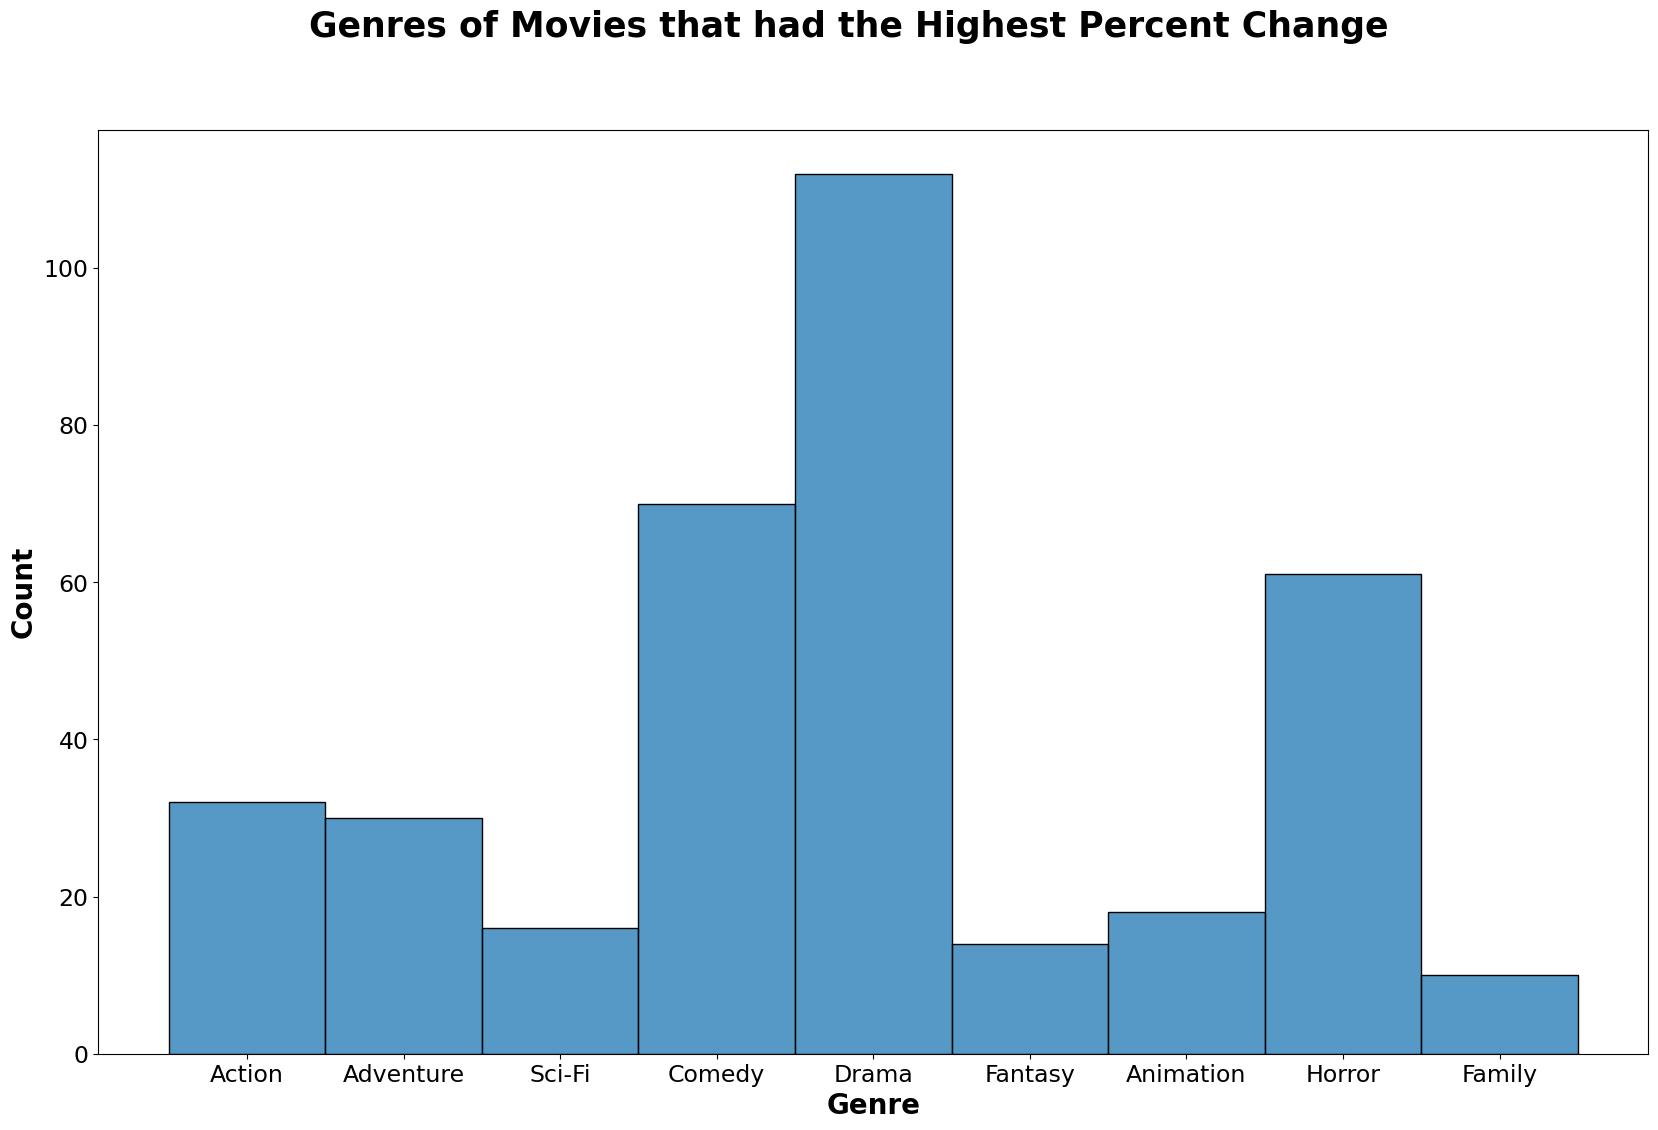

In [76]:
fig = plt.figure(figsize=(20,12), dpi=100)

fig, ax = plt.subplots(figsize=(20,12), dpi=100, facecolor='w', edgecolor='k')

graph = sns.histplot(data=concat_percent.Genre)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Genres of Movies that had the Highest Percent Change", fontweight='bold', fontsize=25)
ax.set_xlabel("Genre", fontsize=20, fontweight='bold')
ax.set_ylabel("Count", fontsize=20, fontweight='bold')
;

Text(0, 0.5, 'Count')

<Figure size 2000x1600 with 0 Axes>

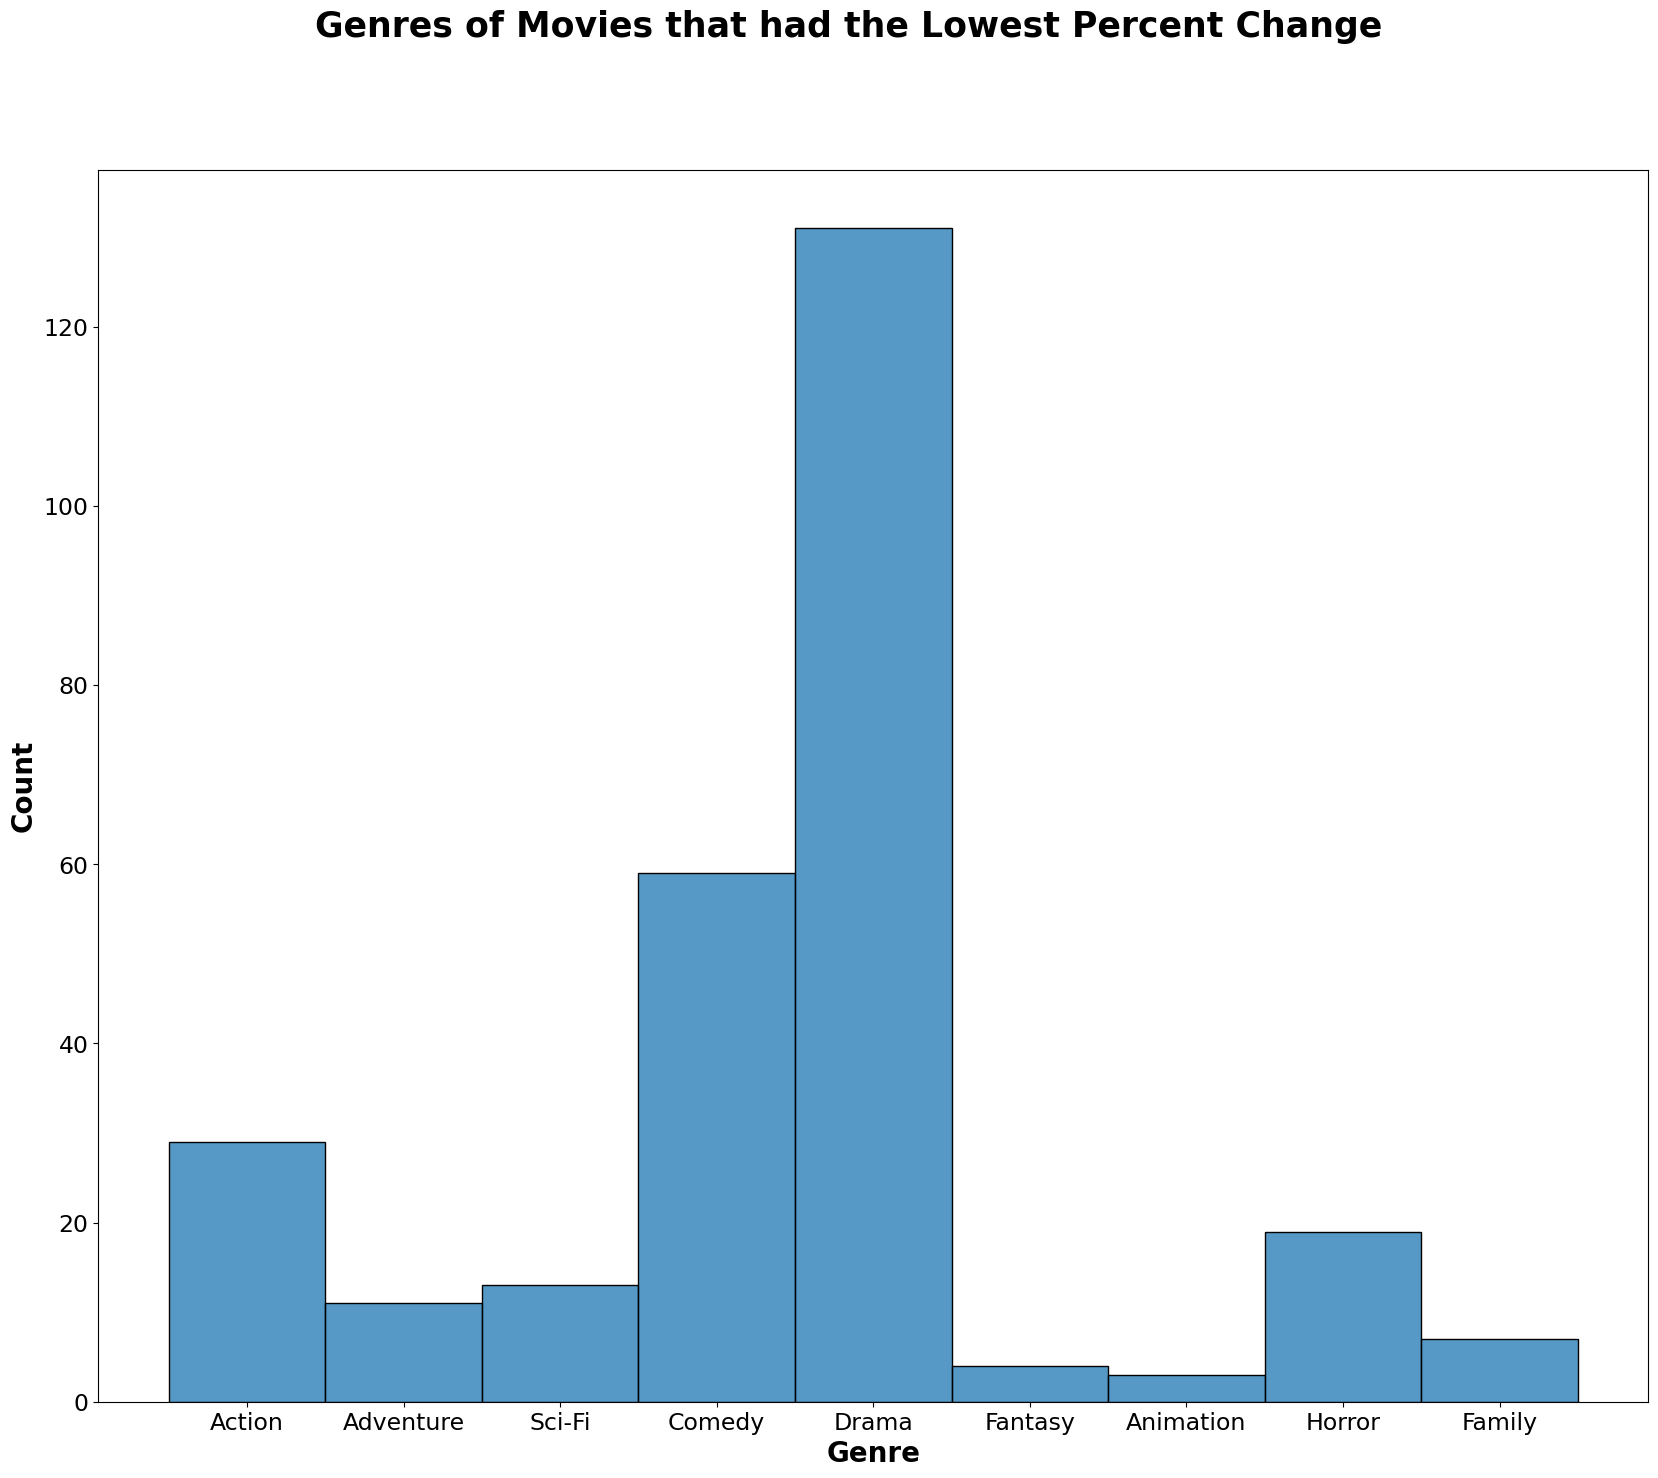

In [43]:
fig = plt.figure(figsize=(20,16), dpi=100)

fig, ax = plt.subplots(figsize=(20,16), dpi=100, facecolor='w', edgecolor='k')

graph = sns.histplot(data=concat_bot_percent.Genre)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Genres of Movies that had the Lowest Percent Change", fontweight='bold', fontsize=25)
ax.set_xlabel("Genre", fontsize=20, fontweight='bold')
ax.set_ylabel("Count", fontsize=20, fontweight='bold')

In [49]:
print('This is the average production budget: ${:,.2f}'.format(budget['production_budget'].mean()))
print('This is the average profit: ${:,.2f}'.format(budget['ROI'].mean()))
print('This is the average rating:', concat_directors['rating_average'].mean())

This is the average production budget: $34,033,480.05
This is the average profit: $112,985,491.90
This is the average rating: 6.350614035087721


In [69]:
print('This is the average production budget for the movies with the greatest ROI: ${:,.2f}'.format(top_directors['production_budget'].mean()))
print('This is the average profit: ${:,.2f}'.format(top_directors['ROI'].mean()))
print('This is the average rating:', top_directors['rating_average'].mean())
print('This is the average percent increase: ', top_directors['Percent_change'].mean())

This is the average production budget for the movies with the greatest ROI: $139,244,090.91
This is the average profit: $842,331,776.57
This is the average rating: 6.980909090909087
This is the average percent increase:  956.1409486207693


In [46]:
print('This is the average production budget for the movies with the greatest percent change: ${:,.2f}'.format(top_genres['production_budget'].mean()))
print('This is the average profit: ${:,.2f}'.format(top_genres['ROI'].mean()))
print('This is the average percent increase:', top_genres['Percent_change'].mean())

This is the average production budget for the movies with the greatest percent change: $16,030,030.23
This is the average profit: $270,475,655.32
This is the average percent increase: 3333.9820113243195


In [52]:
top_writers = writers_ROI.sort_values(by='ROI', ascending=False)
top_writers = top_writers.iloc[:516]

bot_writers = writers_ROI.sort_values(by='ROI', ascending=True)
bot_writers = bot_writers.iloc[:516]

In [53]:
top_writers.head(10)

,writer,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average
65256,Yûsuke Yamada,Avatar,Horror,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,732.200683,18676.0,6.1
65257,Teruo Noguchi,Avatar,Horror,"Dec 18, 2009",425000000.0,760507625.0,2.776345e+09,3.111853e+09,732.200683,18676.0,6.1
10319,George Lucas,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0
10313,Lawrence Kasdan,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0
10315,J.J. Abrams,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0
10317,Michael Arndt,Star Wars Ep. VII: The Force Awakens,"Action,Adventure,Fantasy","Dec 18, 2015",306000000.0,936662225.0,2.053311e+09,2.683973e+09,877.115505,12641.0,8.0
63412,Kevin Lincoln,Titanic,Adventure,"Dec 19, 1997",200000000.0,659363944.0,2.208208e+09,2.667572e+09,1333.786170,20.0,6.2
4427,Steve Englehart,Avengers: Infinity War,"Action,Adventure,Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5
4426,Joe Simon,Avengers: Infinity War,"Action,Adventure,Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5
4432,Larry Lieber,Avengers: Infinity War,"Action,Adventure,Sci-Fi","Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,2.426950e+09,808.983227,13948.0,8.5


In [69]:
findings = writers_ROI.loc[writers_ROI['writer'].str.contains('Peele')]
findings

,writer,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average
15965,Jordan Peele,Get Out,"Horror,Mystery,Thriller","Feb 24, 2017",5000000.0,176040665.0,255367951.0,426408616.0,8528.17232,8760.0,7.7
29480,Jordan Peele,Us,"Horror,Mystery,Thriller","Mar 22, 2019",20000000.0,175006930.0,254210310.0,409217240.0,2046.08620,102511.0,7.1
57231,Jordan Peele,Keanu,"Action,Comedy,Crime","Apr 29, 2016",15000000.0,20591853.0,20688141.0,26279994.0,175.19996,644.0,6.3


In [57]:
quentin = writers_ROI.loc[writers_ROI['writer'].str.contains('Quentin Tarantino')]
lucas = writers_ROI.loc[writers_ROI['writer'].str.contains('George Lucas')]
coen = writers_ROI.loc[writers_ROI['writer'].str.contains('Joel Coen')]
markus = writers_ROI.loc[writers_ROI['writer'].str.contains('Christopher Markus')]
nolan = writers_ROI.loc[writers_ROI['writer'].str.contains('Christopher Nolan')]
daurio = writers_ROI.loc[writers_ROI['writer'].str.contains('Ken Daurio')]

some_writers = pd.concat([quentin, lucas, coen, markus, nolan, daurio])

<Figure size 2000x1600 with 0 Axes>

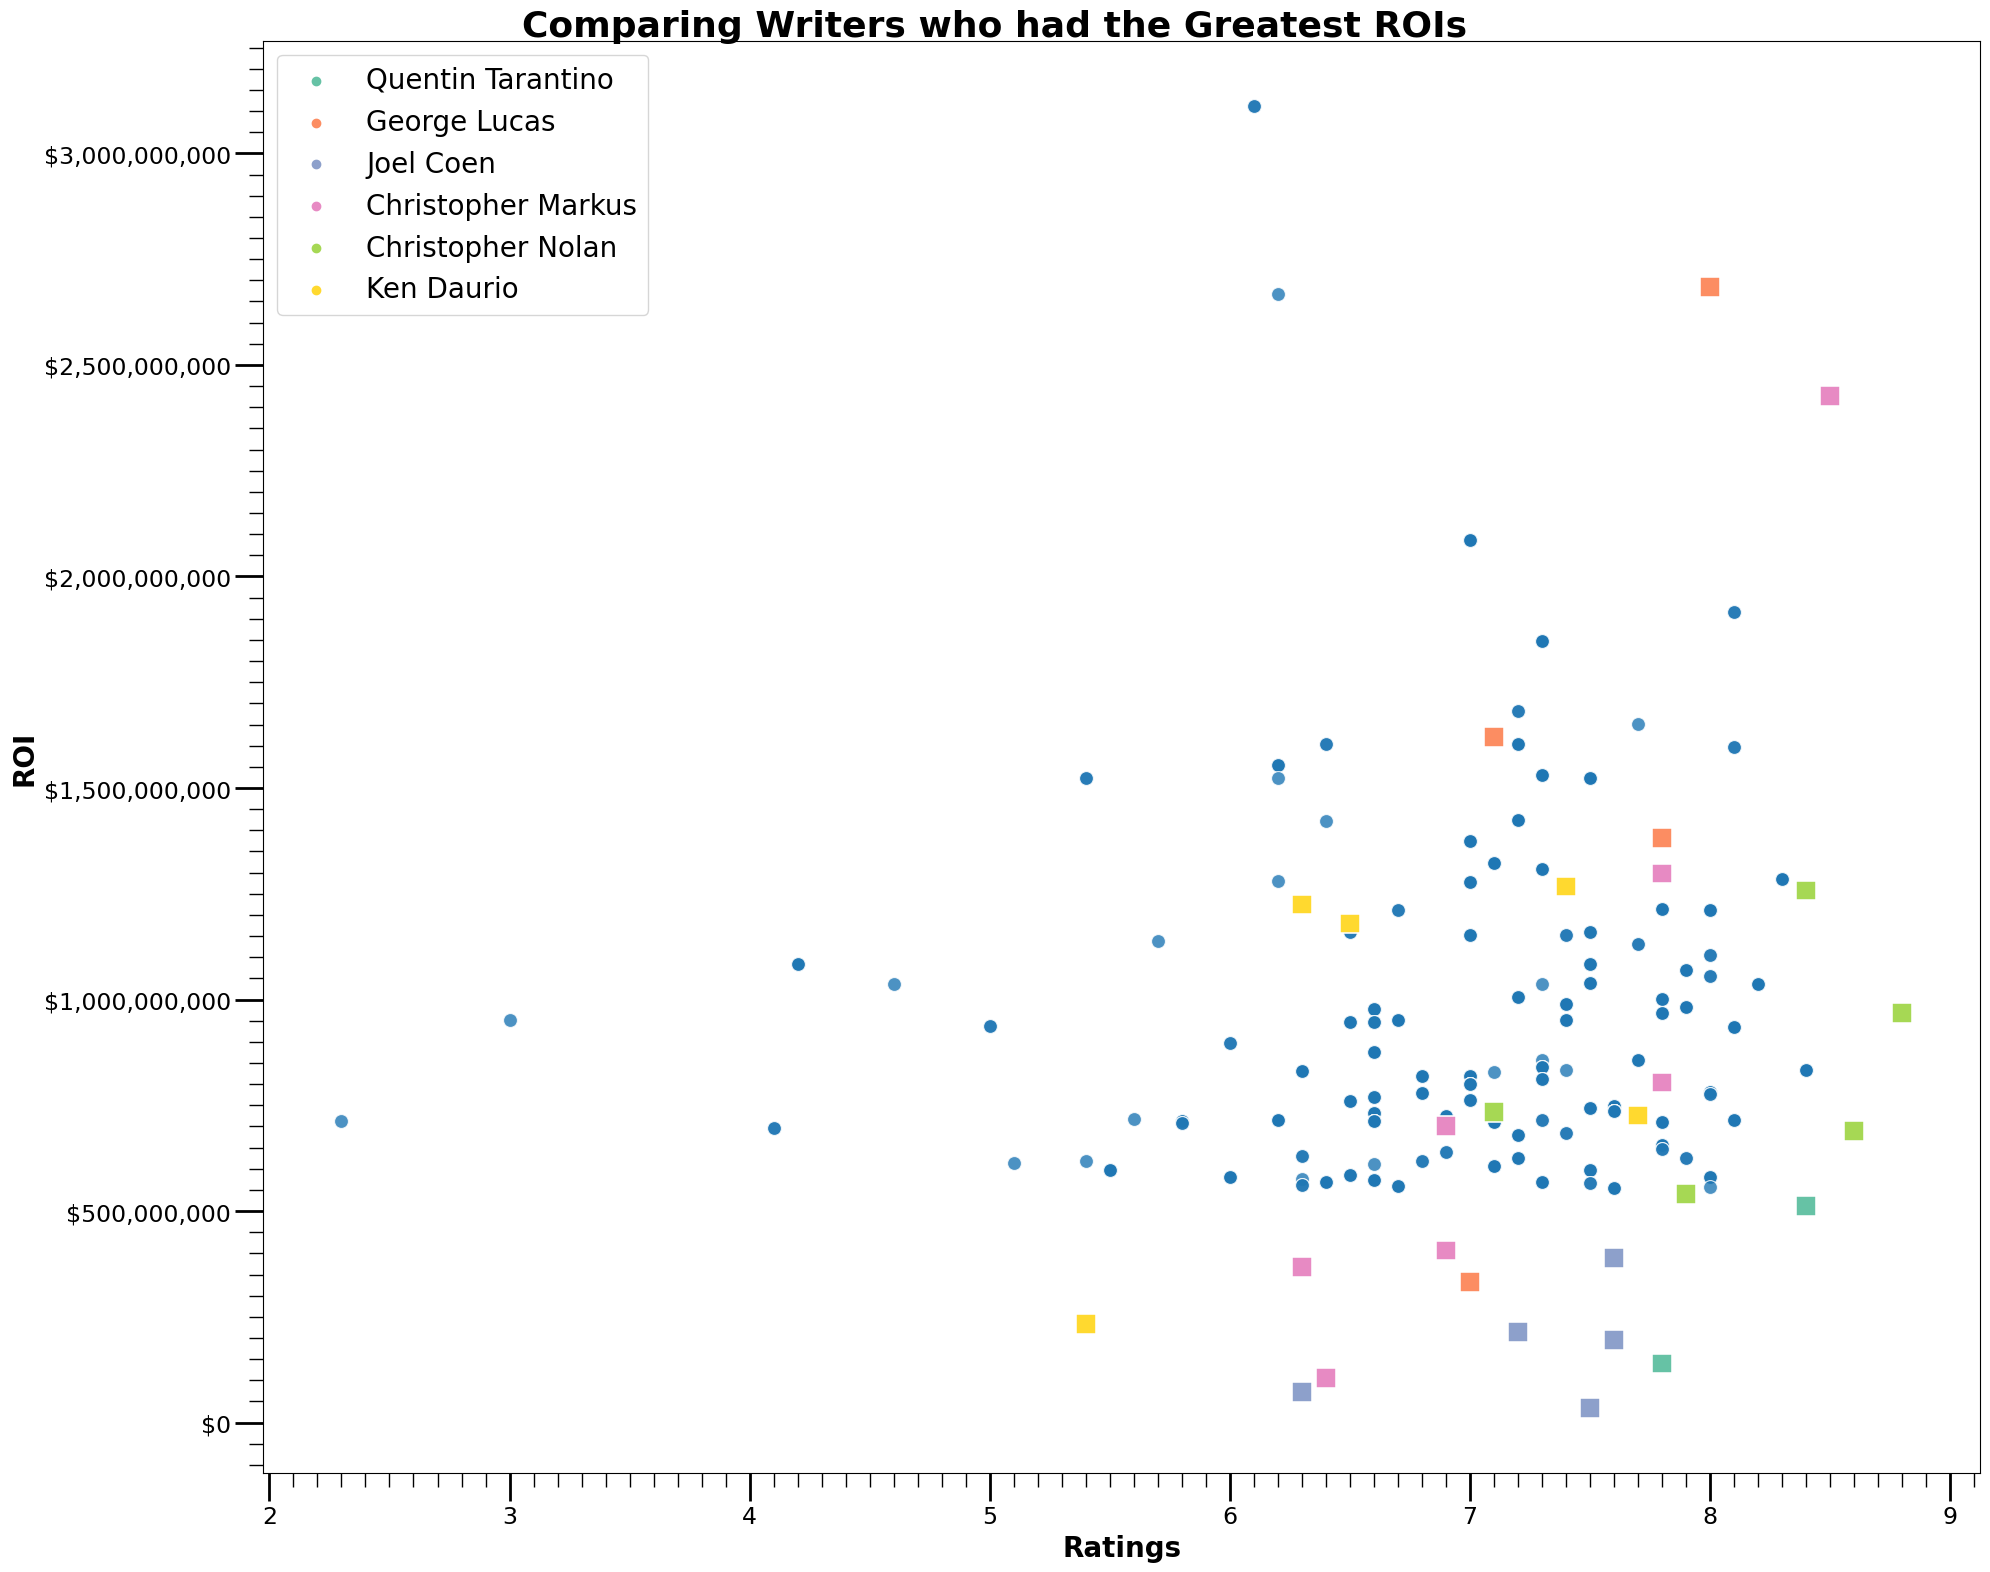

In [58]:
fig = plt.figure(figsize=(20,16), dpi=100)

fig, ax = plt.subplots(figsize=(20,16), dpi=100, facecolor='w', edgecolor='k')

top_writers_graph = sns.scatterplot(x='rating_average', y='ROI', data=top_writers, legend='full', alpha=0.8, s=100, palette='Set2')
writers_graph = sns.scatterplot(x='rating_average', y='ROI', data=some_writers, legend='full', s=200, hue='writer', palette='Set2', marker='s')

ax.yaxis.set_major_locator(MultipleLocator(500000000.00))
ax.yaxis.set_minor_locator(MultipleLocator(50000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Comparing Writers who had the Greatest ROIs", fontweight='bold', fontsize=26)
ax.set_xlabel("Ratings", fontsize=20, fontweight='bold')
ax.set_ylabel("ROI", fontsize=20, fontweight='bold')

plt.legend(fontsize=20)

plt.tight_layout()

In [59]:
top_famousppl = famousppl_ROI.sort_values(by='ROI', ascending=False)
top_famousppl = top_famousppl.iloc[:5000]

In [92]:
findings1 = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Scarlett Johansson')]
findings1

,renown,primary_profession,movie,genres,release_date,production_budget,domestic_gross,worldwide_gross,ROI,Percent_change,vote_count,rating_average
45434,Scarlett Johansson,"actress,soundtrack,producer",The Avengers,"Action,Adventure,Sci-Fi","May 4, 2012",225000000.0,623279547.0,1.517936e+09,1.916215e+09,851.651308,1183655.0,8.1
53907,Scarlett Johansson,"actress,soundtrack,producer",Her,"Drama,Romance,Sci-Fi","Jan 10, 2014",23000000.0,25568251.0,4.816382e+07,5.073207e+07,220.574200,467232.0,8.0
306669,Scarlett Johansson,"actress,soundtrack,producer",Under the Skin,"Drama,Horror,Sci-Fi","Apr 4, 2014",13300000.0,2614251.0,7.229933e+06,-3.455816e+06,-25.983579,113196.0,6.3


In [94]:
pitt = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Brad Pitt')]
evans = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Chris Evans')]
lawrence = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Jennifer Lawrence')]
dicaprio = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Leonardo DiCaprio')]
vin = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Vin Diesel')]
craig = famousppl_ROI.loc[famousppl_ROI['renown'].str.contains('Daniel Craig')]

some_famousppl = pd.concat([pitt, evans, lawrence, dicaprio, vin, craig])

<Figure size 2000x1600 with 0 Axes>

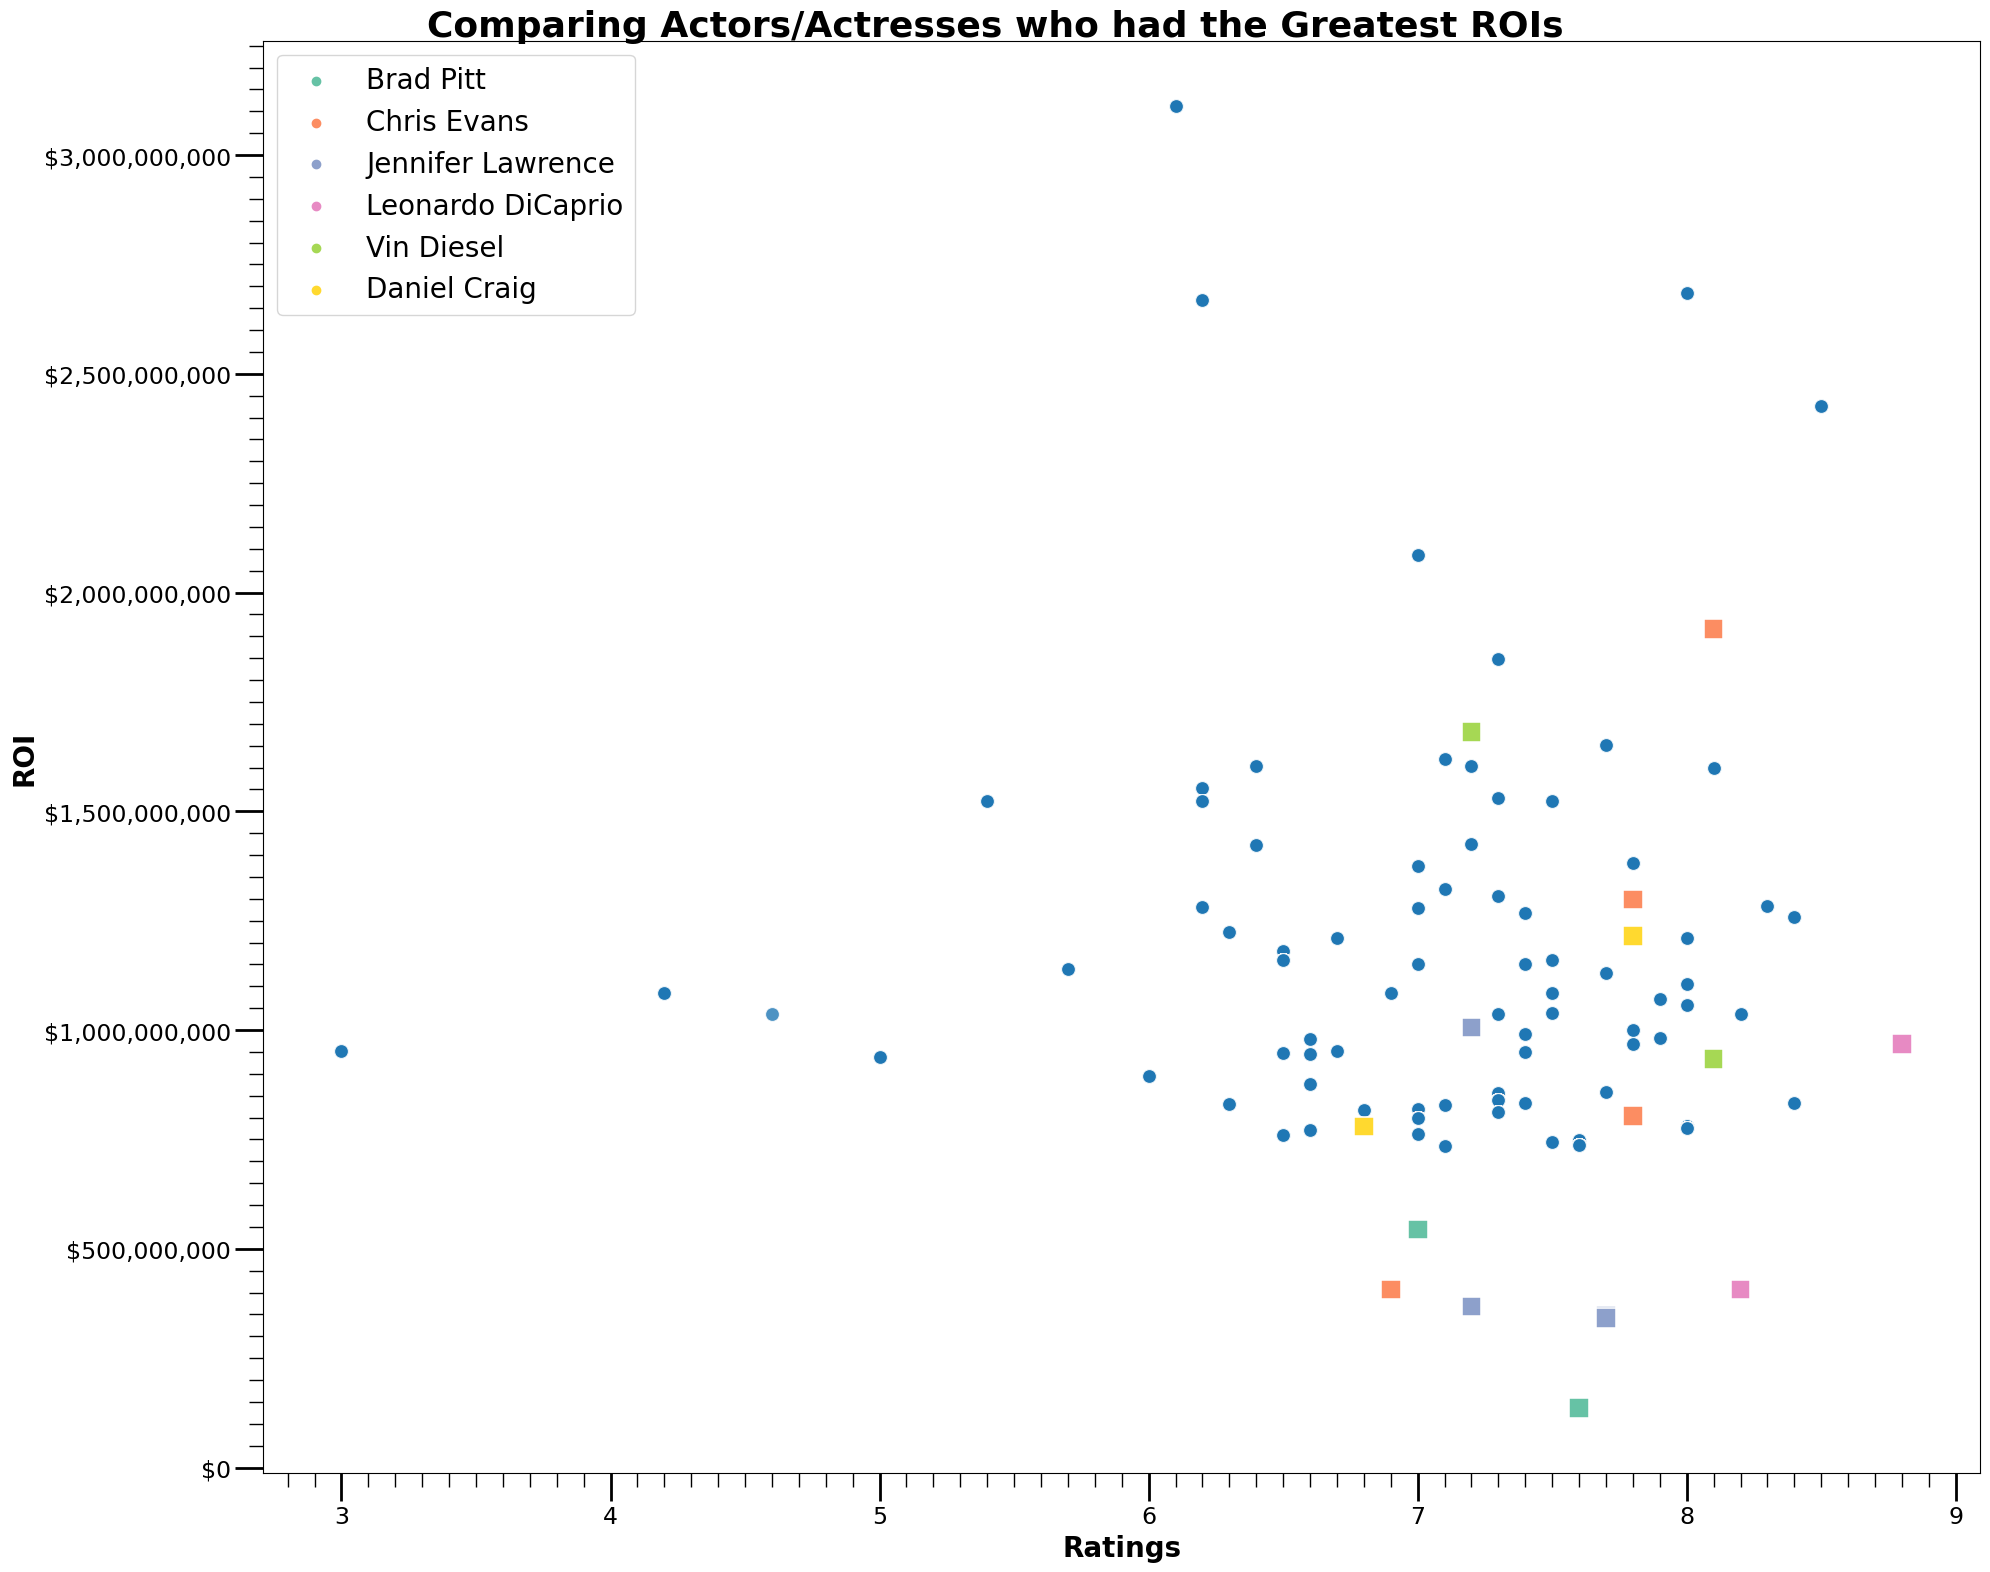

In [97]:
fig = plt.figure(figsize=(20,16), dpi=100)

fig, ax = plt.subplots(figsize=(20,16), dpi=100, facecolor='w', edgecolor='k')

top_famousppl_graph = sns.scatterplot(x='rating_average', y='ROI', data=top_famousppl, legend='full', alpha=0.8, s=100, palette='Set2')
famousppl_graph = sns.scatterplot(x='rating_average', y='ROI', data=some_famousppl, legend='full', s=200, hue='renown', palette='Set2', marker='s')

ax.yaxis.set_major_locator(MultipleLocator(500000000.00))
ax.yaxis.set_minor_locator(MultipleLocator(50000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Comparing Actors/Actresses who had the Greatest ROIs", fontweight='bold', fontsize=26)
ax.set_xlabel("Ratings", fontsize=20, fontweight='bold')
ax.set_ylabel("ROI", fontsize=20, fontweight='bold')

plt.legend(fontsize=20)

plt.tight_layout()